# Import packages

In [5]:
!pip install python-dotenv
!pip install pycountry_convert

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.7/231.7 kB 23.7 MB/s eta 0:00:00


In [6]:
from dotenv import load_dotenv
import os
import numpy as np
import pandas as pd
import geopandas as gpd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Utility Functions

In [4]:
class CleanCountriesChangeColumns:

  iso3 = 'iso3'
  omission_commission_estimates = 'omission_commission_estimates'
  passengers_pedestrians_estimates = 'passengers_pedestrians_estimates'
  law_illegal_legal_estimates = 'law_illegal_legal_estimates'
  gender_male_female_estimates = 'gender_male_female_estimates'
  fitness_large_fit_estimates = 'fitness_large_fit_estimates'
  social_status_low_high_estimates = 'social_status_low_high_estimates'
  age_elderly_young_estimates = 'age_elderly_young_estimates'
  num_characters_less_more_estimates = 'num_characters_less_more_estimates'
  species_pets_humans_estimates = 'species_pets_humans_estimates'
  omission_commission_se = 'omission_commission_se'
  passengers_pedestrians_se = 'passengers_pedestrians_se'
  law_illegal_legal_se = 'law_illegal_legal_se'
  gender_male_female_se = 'gender_male_female_se'
  fitness_large_fit_se = 'fitness_large_fit_se'
  social_status_low_high_se = 'social_status_low_high_se'
  age_elderly_young_se = 'age_elderly_young_se'
  num_characters_less_more_se = 'num_characters_less_more_se'
  species_pets_humans_se = 'species_pets_humans_se'

  @classmethod
  def convert_columns_to_clean_columns(cls):
    return {
      "Unnamed: 0": cls.iso3,
      "[Omission -> Commission]: Estimates": cls.omission_commission_estimates,
      "[Passengers -> Pedestrians]: Estimates": cls.passengers_pedestrians_estimates,
      "Law [Illegal -> Legal]: Estimates": cls.law_illegal_legal_estimates,
      "Gender [Male -> Female]: Estimates": cls.gender_male_female_estimates,
      "Fitness [Large -> Fit]: Estimates": cls.fitness_large_fit_estimates,
      "Social Status [Low -> High]: Estimates": cls.social_status_low_high_estimates,
      "Age [Elderly -> Young]: Estimates": cls.age_elderly_young_estimates,
      "No. Characters [Less -> More]: Estimates": cls.num_characters_less_more_estimates,
      "Species [Pets -> Humans]: Estimates": cls.species_pets_humans_estimates,
      "[Omission -> Commission]: se": cls.omission_commission_se,
      "[Passengers -> Pedestrians]: se": cls.passengers_pedestrians_se,
      "Law [Illegal -> Legal]: se": cls.law_illegal_legal_se,
      "Gender [Male -> Female]: se": cls.gender_male_female_se,
      "Fitness [Large -> Fit]: se": cls.fitness_large_fit_se,
      "Social Status [Low -> High]: se": cls.social_status_low_high_se,
      "Age [Elderly -> Young]: se": cls.age_elderly_young_se,
      "No. Characters [Less -> More]: se": cls.num_characters_less_more_se,
      "Species [Pets -> Humans]: se": cls.species_pets_humans_se,
    }


class CleanSurveyColumns:

  response_id = "response_id"
  extended_session_id = "extended_session_id"
  user_id = "user_id"
  scenario_order = "scenario_order"
  intervention = "intervention"
  pedped = "pedped"
  barrier = "barrier"
  crossing_signal = "crossing_signal"
  attribute_level = "attribute_level"
  scenario_type_strict = "scenario_type_strict"
  scenario_type = "scenario_type"
  default_choice = "default_choice"
  non_default_choice = "non_default_choice"
  default_choice_is_omission = "default_choice_is_omission"
  number_of_characters = "number_of_characters"
  diff_number_of_characters = "diff_number_of_characters"
  saved = "saved"
  template = "template"
  description_shown = "description_shown"
  left_hand = "left_hand"
  user_country3 = "user_country3"
  review_age = "review_age"
  review_education = "review_education"
  review_gender = "review_gender"
  review_income = "review_income"
  review_political = "review_political"
  review_religious = "review_religious"

  @classmethod
  def convert_columns_to_clean_columns(cls):
    return {
    'ResponseID': cls.response_id,
    'ExtendedSessionID': cls.extended_session_id,
    'UserID': cls.user_id,
    'ScenarioOrder': cls.scenario_order,
    'Intervention': cls.intervention,
    'PedPed': cls.pedped,
    'Barrier': cls.barrier,
    'CrossingSignal': cls.crossing_signal,
    'AttributeLevel': cls.attribute_level,
    'ScenarioTypeStrict': cls.scenario_type_strict,
    'ScenarioType': cls.scenario_type,
    'DefaultChoice': cls.default_choice,
    'NonDefaultChoice': cls.non_default_choice,
    'DefaultChoiceIsOmission': cls.default_choice_is_omission,
    'NumberOfCharacters': cls.number_of_characters,
    'DiffNumberOFCharacters': cls.diff_number_of_characters,
    'Saved': cls.saved,
    'Template': cls.template,
    'DescriptionShown': cls.description_shown,
    'LeftHand': cls.left_hand,
    'UserCountry3': cls.user_country3,
    'Review_age': cls.review_age,
    'Review_education': cls.review_education,
    'Review_gender': cls.review_gender,
    'Review_income': cls.review_income,
    'Review_political': cls.review_political,
    'Review_religious': cls.review_religious,
    }


class CleanODBRanking:

  cluster = "Cluster"
  iso3 = "ISO3"
  country = "Country"

  @classmethod
  def get_drop_columns(cls, columns):

    retain = [cls.cluster, cls.iso3, cls.country]
    return [col for col in columns if col not in retain]



def get_scenario_status(count):

  if count == 0:
    return "missing"

  elif count < 2:
    return "invalid_too_few"

  elif count > 2:
    return "invalid_too_many"

  else:
    return "ok"


def check_age_category(age):
    age_ranges = [
        (float('-inf'), -1, "missing"),
        (0, 15, "under_16"),
        (16, 20, "between_16_and_20"),
        (21, 25, "between_21_and_25"),
        (26, 30, "between_26_and_30"),
        (31, 35, "between_31_and_35"),
        (36, 40, "between_36_and_40"),
        (41, 45, "between_41_and_45"),
        (46, 50, "between_46_and_50"),
        (51, 55, "between_51_and_55"),
        (56, 60, "between_56_and_60"),
        (61, 65, "between_61_and_65"),
        (66, 70, "between_66_and_70"),
        (71, 75, "between_71_and_75"),
        (76, 80, "between_76_and_80"),
        (81, 85, "between_81_and_85"),
        (86, 90, "between_86_and_90"),
        (91, 95, "between_91_and_95"),
        (96, 100, "between_96_and_100"),
        (101, float('inf'), "invalid"),
    ]

    for start, end, label in age_ranges:
        if start <= age <= end:
            return label

age_categories = [
    "missing",
    "under_16",
    "between_16_and_20",
    "between_21_and_25",
    "between_26_and_30",
    "between_31_and_35",
    "between_36_and_40",
    "between_41_and_45",
    "between_46_and_50",
    "between_51_and_55",
    "between_56_and_60",
    "between_61_and_65",
    "between_66_and_70",
    "between_71_and_75",
    "between_76_and_80",
    "between_81_and_85",
    "between_86_and_90",
    "between_91_and_95",
    "between_96_and_100",
    "invalid"
]

age_categories = pd.CategoricalDtype(categories=age_categories, ordered=True)

# Load the data

In [5]:
load_dotenv()
DATA_DIRECTORY= "/content/drive/MyDrive/thesis_project"

Load Moral Machine data

In [6]:
df_countries_change = pd.read_csv(f"{DATA_DIRECTORY}/CountriesChangePr.csv")

In [7]:
survey_dtypes = {
    "ScenarioOrder": np.int16,
    "Intervention": bool,
    "PedPed": bool,
    "Barrier": bool,
    "CrossingSignal": np.int16,
    "NumberOfCharacters": np.int16,
    "DiffNumberOFCharacters": np.int16,
    "Saved": bool,
    "DescriptionShown": np.float32,  # Changed from float16 to float32
    "LeftHand": np.float32,          # Changed from float16 to float32
    "Review_political": np.float32,  # Changed from float16 to float32
    "Review_religious": np.float32,  # Changed from float16 to float32
    "Review_age": np.float32,        # Changed from float16 to float32
    "AttributeLevel": "category",
    "ScenarioTypeStrict": "category",
    "ScenarioType": "category",
    "DefaultChoice": "category",
    "NonDefaultChoice": "category",
    "Template": "category",
    "UserCountry3": "category"
}


In [8]:
import pandas as pd
import numpy as np

try:
    df_survey = pd.read_csv(
        f"{DATA_DIRECTORY}/SharedResponsesSurvey.csv",
        low_memory=False,
        dtype=survey_dtypes,
        nrows=300000
    )
except Exception as e:
    print("Error loading the CSV:", e)


/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/c_parser_wrapper.py:239: RuntimeWarning: overflow encountered in cast
  data = self._reader.read(nrows)


Load ODB data

In [9]:
df_odb_ranking = pd.read_csv(f"{DATA_DIRECTORY}/ODB_ranking.csv")

# Overview of the data

## Moral Machine

### Countres Change PR

###General Information

In [10]:
df_countries_change = df_countries_change.rename(columns=CleanCountriesChangeColumns.convert_columns_to_clean_columns())

#### Data contains a list of 130 countries with no missing values. The data contains estimates and standard errors for the following moral dilemmas:

1. Omission vs. Commission
2. Passengers vs. Pedestrians
3. Illegal vs. Legal - Law
4. Male vs. Female - Gender
5. Large vs. Fit - Fitness Level
6. Low vs. High - Social Status
7. Elderly vs. Young - Age
8. Less vs More - Number of Characters
9. Pets vs. Humans - Species

In [11]:
df_countries_change.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso3                                130 non-null    object 
 1   omission_commission_estimates       130 non-null    float64
 2   passengers_pedestrians_estimates    130 non-null    float64
 3   law_illegal_legal_estimates         130 non-null    float64
 4   gender_male_female_estimates        130 non-null    float64
 5   fitness_large_fit_estimates         130 non-null    float64
 6   social_status_low_high_estimates    130 non-null    float64
 7   age_elderly_young_estimates         130 non-null    float64
 8   num_characters_less_more_estimates  130 non-null    float64
 9   species_pets_humans_estimates       130 non-null    float64
 10  omission_commission_se              130 non-null    float64
 11  passengers_pedestrians_se           130 non-n

In [12]:
df_countries_change.head()

,iso3,omission_commission_estimates,passengers_pedestrians_estimates,law_illegal_legal_estimates,gender_male_female_estimates,fitness_large_fit_estimates,social_status_low_high_estimates,age_elderly_young_estimates,num_characters_less_more_estimates,species_pets_humans_estimates,omission_commission_se,passengers_pedestrians_se,law_illegal_legal_se,gender_male_female_se,fitness_large_fit_se,social_status_low_high_se,age_elderly_young_se,num_characters_less_more_se,species_pets_humans_se
0,AFG,0.076590,0.004591,0.300034,-0.007555,0.190209,0.336342,0.390149,0.466343,0.575618,0.030863,0.067429,0.055719,0.079866,0.083326,0.108407,0.077348,0.097474,0.092009
1,AGO,0.035095,-0.072331,0.361608,0.035080,0.119326,0.483079,0.461627,0.462463,0.593738,0.028761,0.070610,0.058977,0.074017,0.073624,0.093549,0.061123,0.061661,0.071225
2,ALB,0.047206,0.054628,0.345108,0.112580,0.188009,0.283644,0.482305,0.514453,0.603087,0.014706,0.025942,0.027743,0.032191,0.032768,0.048322,0.032980,0.028442,0.030503
3,AND,0.061887,0.230754,0.411267,0.167290,0.105061,0.257421,0.483551,0.516631,0.556225,0.025191,0.048591,0.053364,0.064477,0.078124,0.096929,0.068020,0.062986,0.091942
4,ARE,0.037076,0.122503,0.357704,0.117195,0.118928,0.321926,0.447204,0.522104,0.576739,0.005299,0.010248,0.010400,0.012844,0.012940,0.018577,0.012423,0.010781,0.012090




---



---



---



### Survey

In [13]:
df_survey = df_survey.rename(columns=CleanSurveyColumns.convert_columns_to_clean_columns())

###General Information

There are 11,286,141 #3lac responses in the dataset in total.

In [14]:
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   response_id                 300000 non-null  object  
 1   extended_session_id         300000 non-null  object  
 2   user_id                     300000 non-null  float64 
 3   scenario_order              300000 non-null  int16   
 4   intervention                300000 non-null  bool    
 5   pedped                      300000 non-null  bool    
 6   barrier                     300000 non-null  bool    
 7   crossing_signal             300000 non-null  int16   
 8   attribute_level             300000 non-null  category
 9   scenario_type_strict        300000 non-null  category
 10  scenario_type               300000 non-null  category
 11  default_choice              268306 non-null  category
 12  non_default_choice          268306 non-null  category
 13 

# ODB

###General Information

In [15]:
import pandas as pd

# Read the CSV file into a DataFrame
df_odb_ranking = pd.read_csv(f"{DATA_DIRECTORY}/ODB_ranking.csv")

# Display basic information about the DataFrame
print("Basic Information about the DataFrame:")
print(df_odb_ranking.info())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df_odb_ranking.describe())

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df_odb_ranking.head())

# Display unique values in selected columns
print("\nUnique values in selected columns:")
print("Regions:", df_odb_ranking['Region'].unique())
print("Income Levels:", df_odb_ranking['Income'].unique())
print("G20 Membership:", df_odb_ranking['G20'].unique())
print("G7 Membership:", df_odb_ranking['G7'].unique())
print("Clusters:", df_odb_ranking['Cluster'].unique())

Basic Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            86 non-null     int64  
 1   Region                          86 non-null     object 
 2   Income                          86 non-null     object 
 3   ISO2                            85 non-null     object 
 4   ISO3                            86 non-null     object 
 5   ODB-Rank                        86 non-null     int64  
 6   Country                         86 non-null     object 
 7   ODB-Score                       86 non-null     float64
 8   Readiness                       86 non-null     float64
 9   Implementation                  86 non-null     float64
 10  Impact                          86 non-null     float64
 11  ODB-Scaled                      86 non-null     float64
 12 

### Missing Values

There are several columns with null values:

* **default_choice** [1,201,814 missing] - Default choice is dependent of the different scenario types. For instance, Gender has the default choice of Male. The default choice will be used/dropped from further processing.

* **nondefault_choice** [1,201,814 missing] Non-default choice is dependent of the different scenario types. For instance, Gender has the non-default choice of Female. The default choice will be used/dropped from further processing.

* **default_choice_is_omission** [1,201,814 missing] - With omission it is refered to an intervention of 0, while the default choice is already given in the default_choice column. However when omission is 1, the characters associated with the default choice will be faced the deathful option in the dilemma. Meaning: they will be killed when the car does not intervene. So 0 means no intervention in the dilemma of the car and 1 means there is intervention.

* **template** [398 missing] - The template refers to the template used during the survey. Which is not relevant for further processing.

* **description_shown** [398 missing] - The description shown refers to the description of the dilemma. Which is not relevant for further processing.

* **left_hand** [398 missing] - Refers to the hand used while filling in the survey. For the scope of the research this will be dropped since it does not carry any relevance.

* **user_country3** [41,641 missing] - The ISO-3 codes of countries are given, based on the country from which the participant filled in the survey.

* **review_age** [1,360,030 missing] - Review age shows the age in a rounded number for instance: 16.0. In other research this variable was some times used and some times not. As a comprise, we can use this variable as a binned categorical feature instead


In [16]:
df_survey.isnull().sum()

response_id                       0
extended_session_id               0
user_id                           0
scenario_order                    0
intervention                      0
pedped                            0
barrier                           0
crossing_signal                   0
attribute_level                   0
scenario_type_strict              0
scenario_type                     0
default_choice                31694
non_default_choice            31694
default_choice_is_omission    31694
number_of_characters              0
diff_number_of_characters         0
saved                             0
template                         12
description_shown                12
left_hand                        12
user_country3                   233
review_age                    35387
review_education                  0
review_gender                     0
review_income                     0
review_political                  0
review_religious                  0
dtype: int64

# Data Pipeline

In [17]:
!pip install plantuml
from plantuml import PlantUML
plantuml_server = PlantUML(url='http://www.plantuml.com/plantuml/img/')

In [18]:
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 27.7 MB/s eta 0:00:00


In [19]:
!pip install graphviz

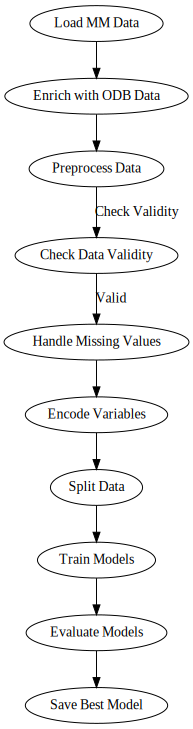

In [20]:
from graphviz import Digraph

dot = Digraph(comment='Data Processing Pipeline')

dot.node('A', 'Load MM Data')
dot.node('B', 'Enrich with ODB Data')
dot.node('C', 'Preprocess Data')
dot.node('D', 'Check Data Validity')
dot.node('E', 'Handle Missing Values')
dot.node('F', 'Encode Variables')
dot.node('G', 'Split Data')
dot.node('H', 'Train Models')
dot.node('I', 'Evaluate Models')
dot.node('J', 'Save Best Model')

dot.edges(['AB', 'BC'])
dot.edge('C', 'D', label='Check Validity')
dot.edge('D', 'E', label='Valid', constraint='true')
dot.edge('E', 'F')
dot.edge('F', 'G')
dot.edge('G', 'H')
dot.edge('H', 'I')
dot.edge('I', 'J')

# Render and display the diagram
dot.render('output/pipeline_diagram', format='png', cleanup=True)
dot


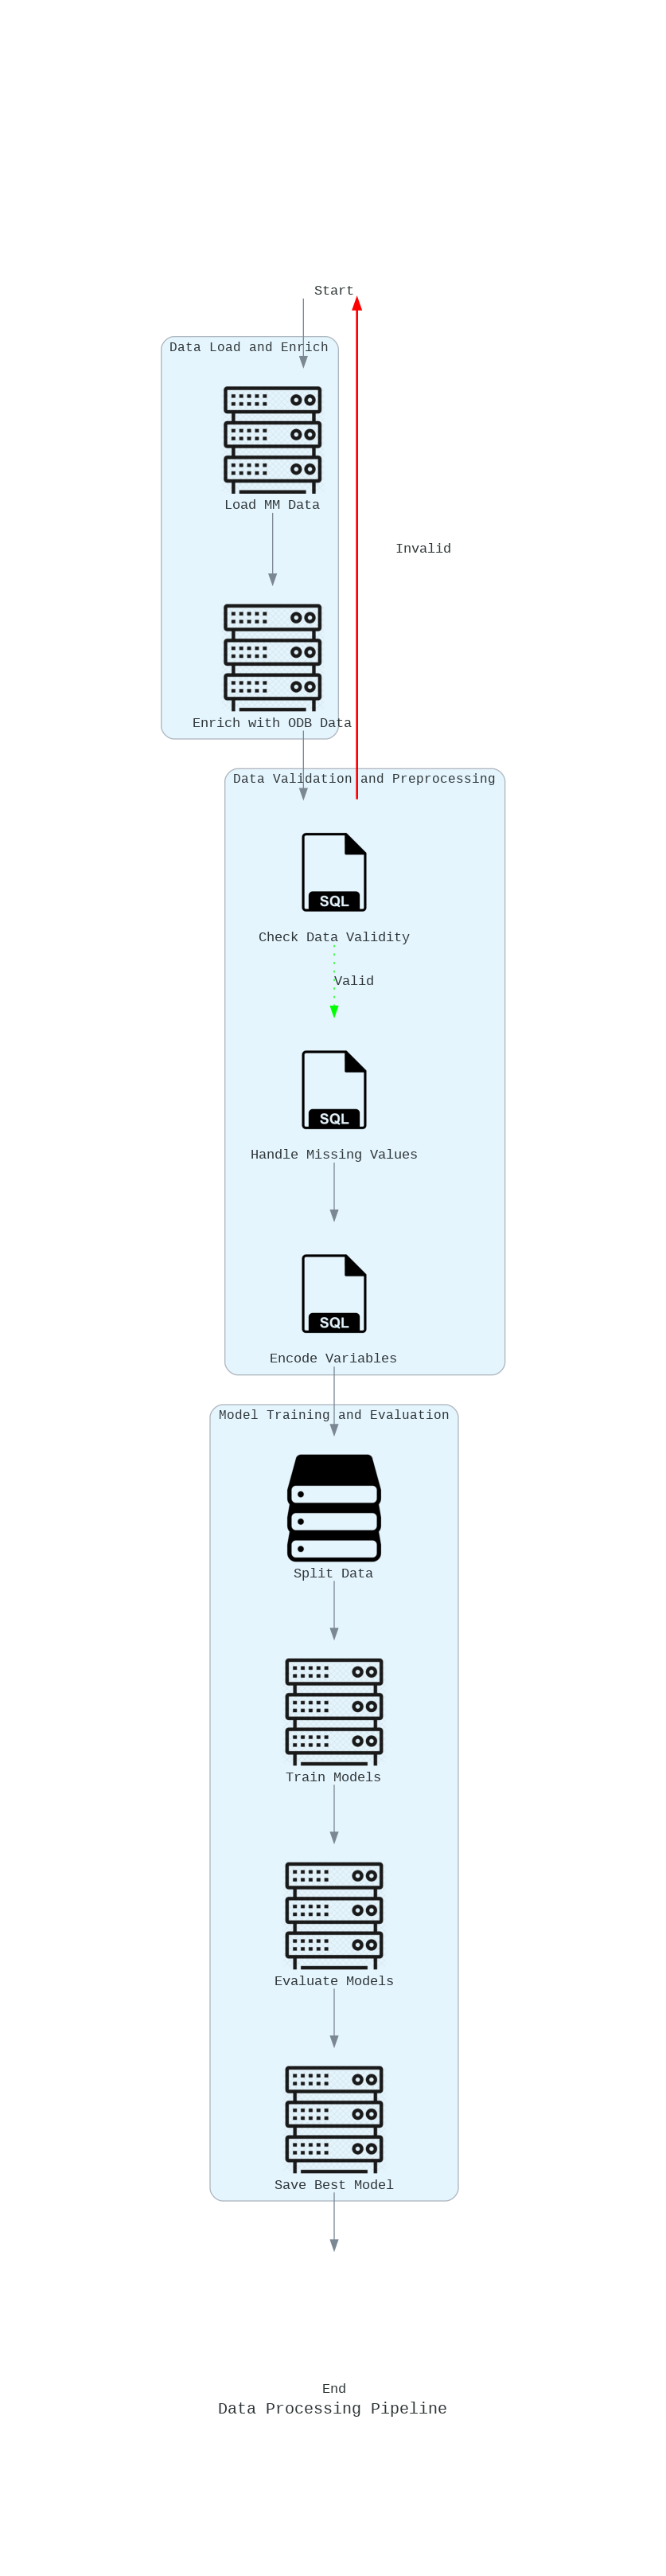

In [21]:
from diagrams import Diagram, Cluster, Edge
from diagrams.generic.blank import Blank
from diagrams.generic.os import IOS
from diagrams.generic.compute import Rack
from diagrams.generic.database import SQL
from diagrams.generic.storage import Storage

with Diagram("Data Processing Pipeline", show=False, direction="TB"):
    start = Blank("Start")

    with Cluster("Data Load and Enrich"):
        load_mm_data = Rack("Load MM Data")
        enrich_data = Rack("Enrich with ODB Data")

    with Cluster("Data Validation and Preprocessing"):
        check_data = SQL("Check Data Validity")
        handle_missing = SQL("Handle Missing Values")
        encode_vars = SQL("Encode Variables")

    with Cluster("Model Training and Evaluation"):
        split_data = Storage("Split Data")
        train_models = Rack("Train Models")
        evaluate_models = Rack("Evaluate Models")
        save_model = Rack("Save Best Model")

    end = Blank("End")

    start >> load_mm_data >> enrich_data >> check_data
    check_data >> Edge(color="green", style="dotted", label="Valid") >> handle_missing
    check_data >> Edge(color="red", style="bold", label="Invalid") >> start
    handle_missing >> encode_vars >> split_data >> train_models >> evaluate_models >> save_model >> end

# To display the diagram within Jupyter
from IPython.display import Image
Image(filename='data_processing_pipeline.png')

In [22]:
!pip install graphviz

In [23]:
from graphviz import Digraph

def create_activity_diagram_two():
    dot = Digraph(comment='Activity Diagram', node_attr={'shape': 'box'})

    # Activity nodes
    dot.node('Start', 'Research Literature Gap', shape='ellipse')
    dot.node('Step1', 'Analyse the Moral Machine Experiment')
    dot.node('Step2', 'Search for related work')
    dot.node('Step3', 'Enrich with ODB data')
    dot.node('Decision', 'Societal Relevance', shape='diamond')
    dot.node('Step4', 'Try Again', style='filled', fillcolor='red')
    dot.node('Step5', 'Formulate RQ and Search ML algorithms')
    dot.node('Decision2', 'Scientific Relevance', shape='diamond')
    dot.node('End', 'Continue Working on Thesis', shape='ellipse')

    # Connecting edges
    dot.edge('Start', 'Step1')
    dot.edge('Step1', 'Step2')
    dot.edge('Step2', 'Step3')
    dot.edge('Step3', 'Decision')
    dot.edge('Decision', 'Step4', label='No')
    dot.edge('Decision', 'Decision2', label='Yes')
    #dot.edge('Decision', 'Decision2')
    dot.edge('Decision2', 'Step4', label='No')
    dot.edge('Decision2', 'Step5', label='Yes')
    dot.edge('Step4', 'Start')
    dot.edge('Step5', 'End')

    # Render and display within Jupyter
    dot.format = 'png'
    return dot.render('activity_diagram', directory='content', view=True, cleanup=True)

create_activity_diagram_two()


'content/activity_diagram.png'

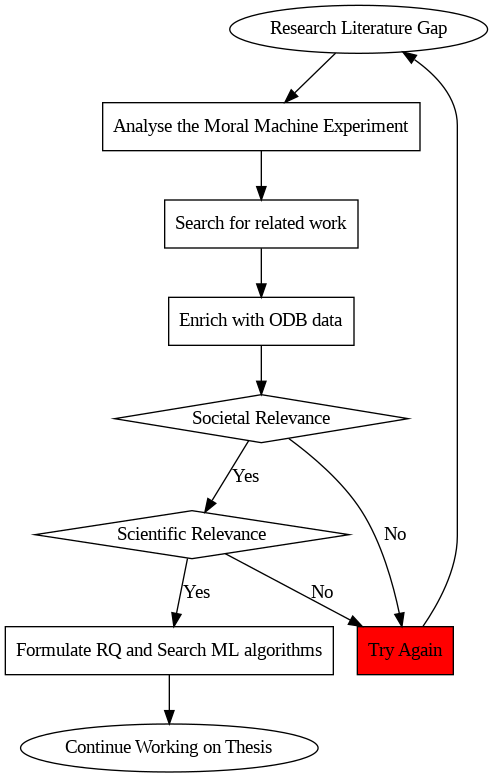

In [24]:
from IPython.display import Image, display

# Display the generated diagram
image_path = create_activity_diagram_two()  # This will also print the path as a side-effect
display(Image(filename=image_path))

Literature Gap

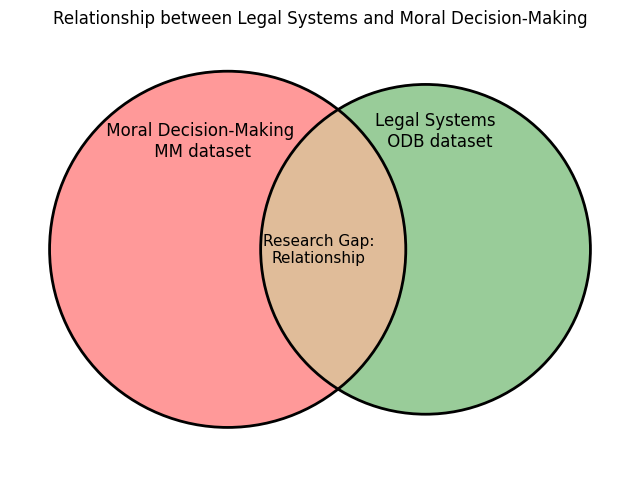

In [25]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

# Define the sets
legal_systems = 50  # Placeholder value
moral_decision_making = 40  # Placeholder value
overlap = 20  # Placeholder value

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn = venn2(subsets=(legal_systems, moral_decision_making, overlap),
             set_labels=('Legal Systems', 'Moral Decision-Making'))

# Add circles around the sets
venn2_circles(subsets=(legal_systems, moral_decision_making, overlap), linestyle='solid')

# Add text labels for the overlap
plt.text(0, 0, 'Research Gap:\nRelationship', fontsize=11, ha='center', va='center')
plt.text(0.3, 0.3, 'Legal Systems \n ODB dataset', fontsize= 12, ha='center', va='center')
plt.text(-0.3, 0.3, '\n Moral Decision-Making \n MM dataset', fontsize=12, ha='center', va='center')

# Remove numbers
for text in venn.set_labels:
    text.set_text("")

# Remove numbers inside the circles
for text in venn.subset_labels:
    text.set_text("")

# Display the plot
plt.title("Relationship between Legal Systems and Moral Decision-Making")
plt.show()

# Feature Selection

Drop the irrelevant features

Heatmap

In [26]:
!pip install seaborn matplotlib

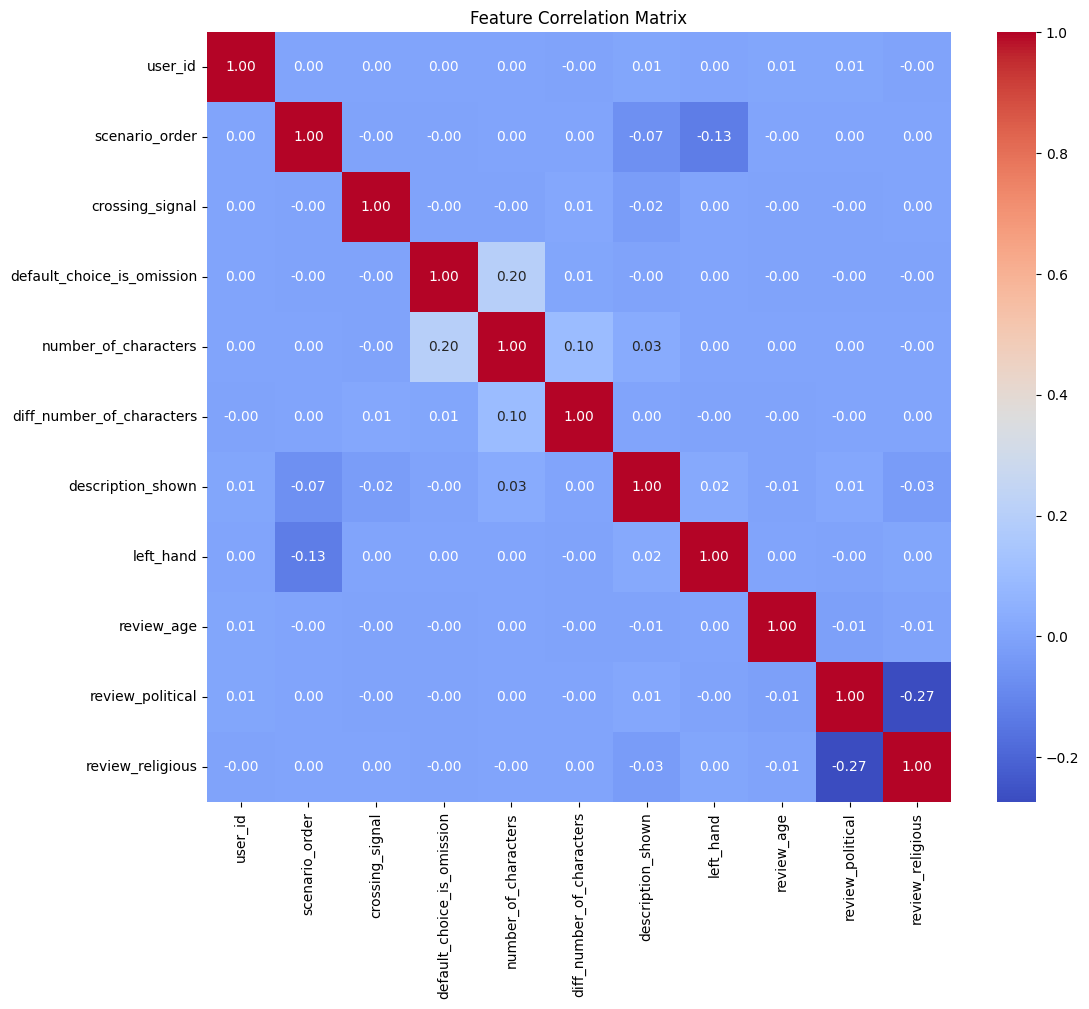

In [27]:
# Select only numeric columns for correlation matrix calculation
numeric_df = df_survey.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


#### Decision on irrelevant features.

1. Default Choice<font>

2. Non-Default Choice<font>

3. Default Choice Is Omission<font>

4. Template<font>

5. Description Shown<font>

6. Left Hand<font>

In [28]:
df_survey = df_survey.drop([
    CleanSurveyColumns.default_choice,
    CleanSurveyColumns.non_default_choice,
    CleanSurveyColumns.left_hand,
    CleanSurveyColumns.default_choice_is_omission,
    CleanSurveyColumns.template,
    CleanSurveyColumns.description_shown
    ], axis=1)

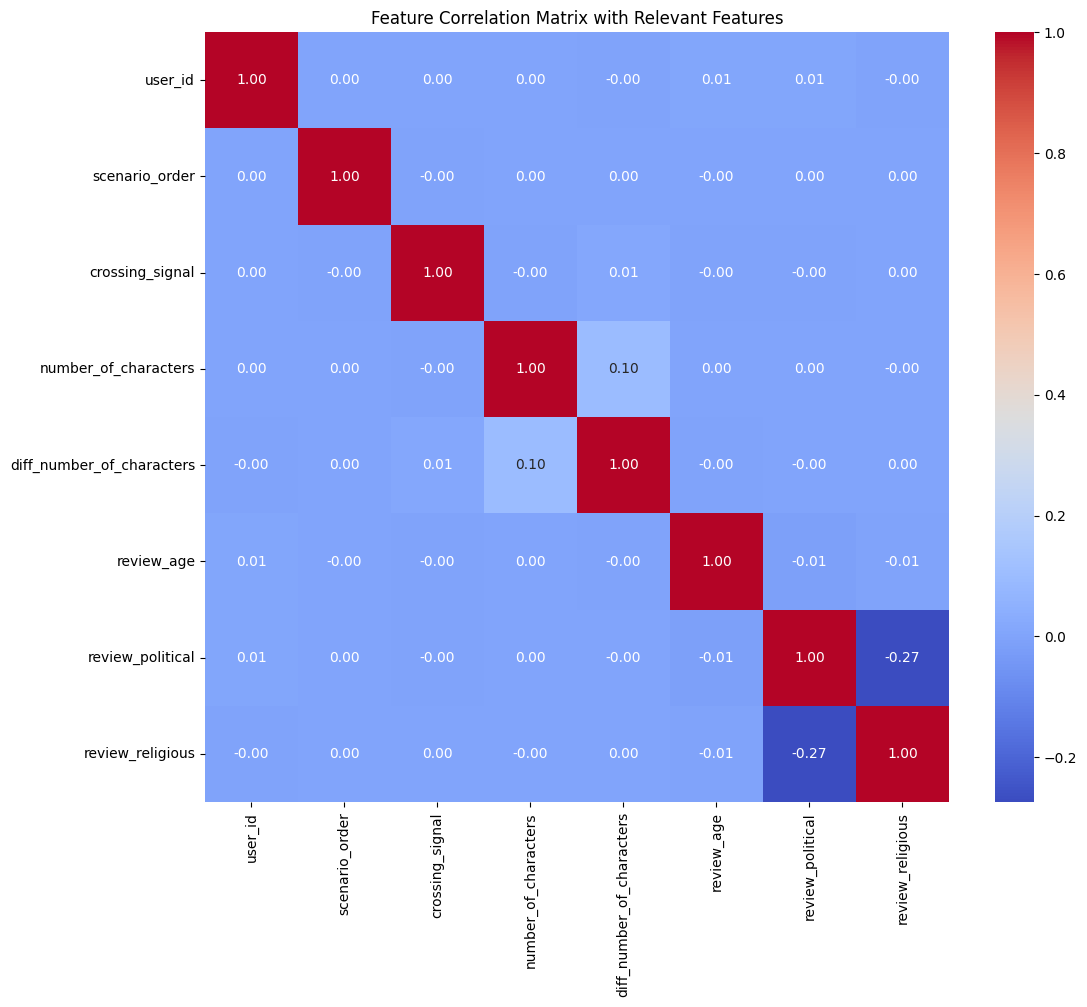

In [29]:
# Select only numeric columns for correlation matrix calculation
numeric_df_relevant = df_survey.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df_relevant.corr()

# Generate a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix with Relevant Features')
plt.show()


In [30]:
import pandas as pd
import numpy as np

# df_survey already contains the features I want to include

traits = ["Law Abiding", "Aggressive", "Cautious"]

# Create a binary matrix: each row corresponds to a feature, each column to a trait
# This is a simplified example: you should populate this based on your theoretical model or empirical analysis
data = {
    "Law Abiding": [1, 0, 0],
    "Aggressive": [0, 1, 0],
    "Cautious": [0, 0, 1]
}

# Features are just placeholders, replace them with your actual features names
features = ['feature1', 'feature2', 'feature3']

# Create the DataFrame
binary_matrix = pd.DataFrame(data, index=features)

# Display the binary transformation matrix
print(binary_matrix)


          Law Abiding  Aggressive  Cautious
feature1            1           0         0
feature2            0           1         0
feature3            0           0         1


# Data Validity

### Users and Sessions

##### In Total there are 463,675 unique user ids in the dataset.

In [31]:
len(df_survey[CleanSurveyColumns.user_id].unique())

26121

In [32]:
unique_users = (
    df_survey
    .groupby(CleanSurveyColumns.user_id, as_index=False)
    [CleanSurveyColumns.extended_session_id]
    .nunique()
    .sort_values(CleanSurveyColumns.extended_session_id, ascending=False)
)

##### There are 24,478 users that had more than one session.

In [33]:
unique_users.query("`extended_session_id` > 1").count()

user_id                112
extended_session_id    112
dtype: int64

##### There are sessions where not the full set of questions were answered.

In [34]:
count_surveys =  (
    df_survey[
        [
            CleanSurveyColumns.user_id,
            CleanSurveyColumns.extended_session_id,
            CleanSurveyColumns.scenario_order,
            CleanSurveyColumns.attribute_level
            ]
        ]
    .sort_values(
        [
            CleanSurveyColumns.user_id,
            CleanSurveyColumns.extended_session_id,
            CleanSurveyColumns.scenario_order
            ]
        )
    .groupby(
        [
            CleanSurveyColumns.extended_session_id,
            CleanSurveyColumns.user_id,
            CleanSurveyColumns.scenario_order
            ],
        as_index=False
        )
    [CleanSurveyColumns.attribute_level]
    .count()
    .pivot(
        index=[
            CleanSurveyColumns.user_id,
            CleanSurveyColumns.extended_session_id
            ],
        columns=[CleanSurveyColumns.scenario_order],
        values=[CleanSurveyColumns.attribute_level]
        )
    .reset_index()
    .fillna(0)
)

rename_cols = [
    f"{col[0]}"
    if col[0] != "attribute_level"
    else f"scenario_{col[1]}_count"
    for col
    in count_surveys.columns
    ]
count_surveys.columns = rename_cols


count_surveys = count_surveys.melt(
    id_vars=[CleanSurveyColumns.user_id, CleanSurveyColumns.extended_session_id],
    value_name="counts",
    var_name="scenario"
    )

In [35]:
count_surveys.sort_values([CleanSurveyColumns.user_id, CleanSurveyColumns.extended_session_id]).iloc[np.r_[0:5, -5:0]]

,user_id,extended_session_id,scenario,counts
0,2.371697e+09,-2029428506_2371697333.0,scenario_1_count,1.0
26239,2.371697e+09,-2029428506_2371697333.0,scenario_2_count,1.0
52478,2.371697e+09,-2029428506_2371697333.0,scenario_3_count,1.0
78717,2.371697e+09,-2029428506_2371697333.0,scenario_4_count,1.0
104956,2.371697e+09,-2029428506_2371697333.0,scenario_5_count,1.0
236150,9.999765e+15,-1918335990_9999765308120170.0,scenario_9_count,1.0
262389,9.999765e+15,-1918335990_9999765308120170.0,scenario_10_count,1.0
288628,9.999765e+15,-1918335990_9999765308120170.0,scenario_11_count,1.0
314867,9.999765e+15,-1918335990_9999765308120170.0,scenario_12_count,1.0
341106,9.999765e+15,-1918335990_9999765308120170.0,scenario_13_count,1.0


## Data issues
### How to deal with invalid responses?

##### Decision On Sessions With Too Many Entries

Sessions where a given question was answered more than once will not be considered for further processing. The reason for this decision is that we cannot determine with certainty what would be user's preference on that question.

Furthermore, there are user sessions where the user tried to answer questions an extraordinary amount of times. These could be considered as either extremely indecisive users or bots.

In [36]:
count_surveys.loc[:, "count_scenario_status"] = (
    count_surveys
    .apply(lambda x: get_scenario_status(x["counts"]),
           axis=1
           )
    )

sessions = (
    count_surveys
    .groupby(['count_scenario_status',  CleanSurveyColumns.extended_session_id], as_index=False).size()
    .pivot(index=[CleanSurveyColumns.extended_session_id], columns="count_scenario_status", values='size')
    .fillna(0)
    .reset_index()
)

In [37]:
too_many_responses_in_session = sessions[sessions["invalid_too_many"] > 0]
too_many_responses_in_session.head()

count_scenario_status,extended_session_id,invalid_too_few,invalid_too_many,missing,ok
10740,-2012284439_1530409422701264.0,10.0,1.0,0.0,2.0
13157,-2033933112_5251503774798667.0,10.0,1.0,2.0,0.0
21352,-2104696609_6670191843404017.0,9.0,2.0,2.0,0.0


In [38]:
(
    count_surveys
    .groupby(CleanSurveyColumns.extended_session_id, as_index=False)
    ["counts"]
    .sum()
    .sort_values("counts", ascending=False)
    .rename(columns={"counts": "count_number_of_responses"})
    .head()
)

,extended_session_id,count_number_of_responses
10740,-2012284439_1530409422701264.0,17.0
12734,-2030224934_9981253297902524.0,17.0
2502,-1940297298_5640255738313156.0,16.0
11463,-2018770784_9850111719006672.0,16.0
21352,-2104696609_6670191843404017.0,15.0




###  Removing sessions with too many responses from dataset.<font>

In [39]:
df_survey = df_survey[~df_survey[CleanSurveyColumns.extended_session_id].isin(too_many_responses_in_session['extended_session_id'])]

##### Duplicate User Sessions

There were 5,927,259 duplicated user sessions, and 462,488 unique ones, after accounting for sessions with too many responses.

For the purposes of the current research, the ones retained for further processing are the ones where:

1. There are maximum amount of valid answers
2. In cases where two sessions with valid answers in provided, the first one is taken, assuming the user session ids are sequential.

In [40]:
sessions_with_max_amount_answered = (
    sessions
    [sessions["invalid_too_many"] == 0]
    .merge(count_surveys[[CleanSurveyColumns.extended_session_id, CleanSurveyColumns.user_id]], on=CleanSurveyColumns.extended_session_id)
    .sort_values([CleanSurveyColumns.user_id, "ok", CleanSurveyColumns.extended_session_id])
)

In [41]:
sessions_with_max_amount_answered.loc[:, "duplicate_user"] = sessions_with_max_amount_answered[ CleanSurveyColumns.user_id].duplicated(keep="first")

In [42]:
sessions_with_max_amount_answered[sessions_with_max_amount_answered["duplicate_user"] == True].count()

extended_session_id    314950
invalid_too_few        314950
invalid_too_many       314950
missing                314950
ok                     314950
user_id                314950
duplicate_user         314950
dtype: int64

In [43]:
sessions_with_max_amount_answered[sessions_with_max_amount_answered["duplicate_user"] == False].count()

extended_session_id    26118
invalid_too_few        26118
invalid_too_many       26118
missing                26118
ok                     26118
user_id                26118
duplicate_user         26118
dtype: int64

### Removing duplicated sessions from dataset.<font>

In [44]:
retain_sessions = (
    sessions_with_max_amount_answered[
        sessions_with_max_amount_answered["duplicate_user"] == False
        ][CleanSurveyColumns.extended_session_id]
    )

df_survey = df_survey[df_survey[CleanSurveyColumns.extended_session_id].isin(retain_sessions)]

### Removing responses where there is a single row for a given response, as these are considered invalid response. <font>

In a [previous paper](https://github.com/tyl21938/moral_machine/blob/main/6882_final_project.ipynb) this is the way that they addressed it.

Suggested changes to be made for the TypeError.

In [45]:
survey_counts = df_survey[CleanSurveyColumns.response_id].value_counts().reset_index()
survey_counts.columns = ['response_id', 'count']

# Filter out response_ids with a count less than 2
survey_ids_to_remove = survey_counts[survey_counts['count'] < 2]['response_id']

In [46]:
df_survey.head()

,response_id,extended_session_id,user_id,scenario_order,intervention,pedped,barrier,crossing_signal,attribute_level,scenario_type_strict,...,number_of_characters,diff_number_of_characters,saved,user_country3,review_age,review_education,review_gender,review_income,review_political,review_religious
0,3ubu5Minm7ygqK3oa,-2147481563_6968366610050747.0,6.968367e+15,13,False,False,False,0,Female,Gender,...,2,0,True,RUS,32.0,bachelor,male,35000,0.5,0.61
1,FKd9Fje2tWt2sHi6v,-2147481563_6968366610050747.0,6.968367e+15,8,False,True,False,0,Fat,Fitness,...,2,0,False,RUS,32.0,bachelor,male,35000,0.5,0.61
2,J6WRHLj8exr4bNwTm,-2147481563_6968366610050747.0,6.968367e+15,2,False,False,False,2,Young,Age,...,2,0,False,RUS,32.0,bachelor,male,35000,0.5,0.61
3,KcYXwqS3rTrbqdTY2,-2147481563_6968366610050747.0,6.968367e+15,1,False,True,False,2,Pets,Species,...,3,0,False,RUS,32.0,bachelor,male,35000,0.5,0.61
4,ZQsAWst58jK9HcKvx,-2147481563_6968366610050747.0,6.968367e+15,5,False,True,False,0,Fit,Fitness,...,2,0,False,RUS,32.0,bachelor,male,35000,0.5,0.61




---



# Data Representability
### How representable is the data?
Analyze 'Age' and 'Gender'

### Gender

The reported gender of people in the survey was:

|Reported Gender| Count|
|---|---|
|male|                295,367|
|female|               114,525|
|default|              42,513|
|others  |              10,079|

In terms of further processing Gender, a [previous paper](https://github.com/tyl21938/moral_machine/blob/main/6882_final_project.ipynb) has used the gender as is. Will not process this further.

In [47]:
(
    df_survey
    .groupby([CleanSurveyColumns.user_id, CleanSurveyColumns.review_gender], as_index=False)
    [CleanSurveyColumns.extended_session_id]
    .size()
    .groupby(CleanSurveyColumns.review_gender, as_index=False)
    [CleanSurveyColumns.user_id]
    .count()
)

,review_gender,user_id
0,default,2499
1,female,6476
2,male,16581
3,others,562


### Age



There are 65,919 users who are under the age 16 and will be considered as minors.

There are 1,330 users who have invalid age (over 100). These users will be removed from further processing.

There are 53,513 users who have not listed their age and be considered as age=missing.

Looking at the distribution, there is a heavy right skew in the data, with majority of the respondents tending to be younger. This makes sense, given that the survey was done online and was mainly diseminated through Redit.

In [48]:
# Replace infinite values with NaNs
df_survey[CleanSurveyColumns.review_age] = df_survey[CleanSurveyColumns.review_age].replace([np.inf, -np.inf], np.nan)

# Apply age category function to create 'binned_age' column
df_survey["binned_age"] = df_survey[CleanSurveyColumns.review_age].apply(check_age_category)

# Convert 'binned_age' column to categorical type
df_survey["binned_age"] = df_survey["binned_age"].astype(age_categories)

# Create age_bins DataFrame with specified column names
age_bins = (
    df_survey["binned_age"]
    .value_counts()
    .reset_index(name="count")
    .sort_index()
    .rename(columns={"index": "age_bin"})
)
age_bins.rename(columns={'binned_age': 'age_bin', 'count': 'count'}, inplace=True)
# Print the first few rows and data types of age_bins
print(age_bins.head())
print(age_bins.info())


             age_bin  count
0  between_16_and_20  73015
1  between_21_and_25  55090
2           under_16  44112
3  between_26_and_30  35293
4  between_31_and_35  22017
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   age_bin  20 non-null     category
 1   count    20 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 1.0 KB
None


In [49]:
age_counts = df_survey[~df_survey[CleanSurveyColumns.user_id].duplicated(keep="first")].copy()
age_counts[CleanSurveyColumns.review_age] = age_counts[CleanSurveyColumns.review_age].fillna(-1)
age_counts["binned_age"] = age_counts[CleanSurveyColumns.review_age].apply(check_age_category)
age_counts["binned_age"] = age_counts["binned_age"].astype(age_categories)

Data Visualisation

<ipython-input-50-5ac94bf9de88>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(new_yticklabels)


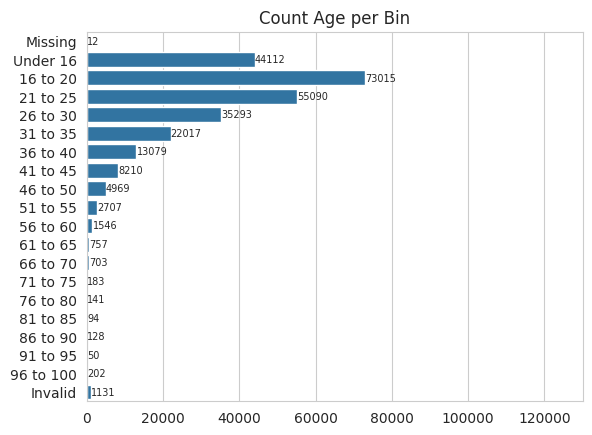

In [50]:
sns.set_style("whitegrid")

ax = sns.barplot(age_bins, y="age_bin", x="count", orient="y")
ax.bar_label(ax.containers[0], fontsize=7)
ax.set(xlabel='', ylabel='')
ax.set_title("Count Age per Bin")
new_yticklabels = [
    "Missing",
    "Under 16",
    "16 to 20",
    "21 to 25",
    "26 to 30",
    "31 to 35",
    "36 to 40",
    "41 to 45",
    "46 to 50",
    "51 to 55",
    "56 to 60",
    "61 to 65",
    "66 to 70",
    "71 to 75",
    "76 to 80",
    "81 to 85",
    "86 to 90",
    "91 to 95",
    "96 to 100",
    "Invalid"
    ]
ax.set_yticklabels(new_yticklabels)
ax.set_xlim(0, 130_000)
plt.show()

#### Decision on users with invalid age.
 Removing Users with invalid age - over 100.<font>

In [51]:
invalid_age_users = age_counts[age_counts["binned_age"] == "invalid"][CleanSurveyColumns.user_id]

df_survey = df_survey[~df_survey[CleanSurveyColumns.user_id].isin(invalid_age_users)]

### User Countries

There are in total 215 ISO codes with responses and 1 for missing countries, to
 a total of 216 unique iso3 items.

There were 403 users who did not specify their country.

In the ODB dataset, there are only 86 countries. After filtering for this, the total amount of user responses per cluster in the ODB dataset is:

|Cluster|	Count Users|
|----|----|
|Capacity constrained|	15824|
|Emerging and advancing|	147144|
|High capacity|	275607|
|One sided initiative|	3430|

The majority of the users came from the US and Brazil.


In [52]:
df_survey.tail()

,response_id,extended_session_id,user_id,scenario_order,intervention,pedped,barrier,crossing_signal,attribute_level,scenario_type_strict,...,diff_number_of_characters,saved,user_country3,review_age,review_education,review_gender,review_income,review_political,review_religious,binned_age
299995,g4Wpucr5EkRwwuDa5,-1918285011_1916183640324624.0,1.916184e+15,13,False,True,False,2,Young,Age,...,0,False,FRA,26.0,high,male,15000,0.65,0.24,between_26_and_30
299996,kpcWptSXCYRy6LXy2,-1918285011_1916183640324624.0,1.916184e+15,2,False,True,False,2,Hoomans,Species,...,0,True,FRA,26.0,high,male,15000,0.65,0.24,between_26_and_30
299997,msbeRJBrSounTFYiu,-1918285011_1916183640324624.0,1.916184e+15,6,False,True,False,0,Fit,Fitness,...,0,False,FRA,26.0,high,male,15000,0.65,0.24,between_26_and_30
299998,nT5hREwrWWGraApMN,-1918285011_1916183640324624.0,1.916184e+15,8,False,True,False,0,Female,Gender,...,0,False,FRA,26.0,high,male,15000,0.65,0.24,between_26_and_30
299999,r59vkZ9BXwy4jueqq,-1918285011_1916183640324624.0,1.916184e+15,7,False,False,True,0,Fit,Fitness,...,0,True,FRA,26.0,high,male,15000,0.65,0.24,between_26_and_30


In [53]:
# Check if the category 'missing' already exists in the column
if 'missing' not in df_survey[CleanSurveyColumns.user_country3].cat.categories:
    # Add the 'missing' category
    df_survey[CleanSurveyColumns.user_country3] = df_survey[CleanSurveyColumns.user_country3].cat.add_categories(["missing"])


<ipython-input-53-1ae840b63414>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey[CleanSurveyColumns.user_country3] = df_survey[CleanSurveyColumns.user_country3].cat.add_categories(["missing"])


In [54]:
df_survey[CleanSurveyColumns.user_country3] = df_survey[CleanSurveyColumns.user_country3].fillna("missing")

<ipython-input-54-bbae0e1b2d75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survey[CleanSurveyColumns.user_country3] = df_survey[CleanSurveyColumns.user_country3].fillna("missing")


In [55]:
iso_3_countries_counts = df_survey[~df_survey[CleanSurveyColumns.user_id].duplicated(keep="first")].copy()
iso_3_countries_counts = iso_3_countries_counts.groupby(CleanSurveyColumns.user_country3, as_index=False)[CleanSurveyColumns.user_id].count()

In [56]:
iso_3_countries_counts.iloc[np.r_[0:5, -5:0]].rename(columns={"user_id": "Count Users"})

,user_country3,Count Users
0,ABW,1
1,AFG,2
2,ALB,7
3,ARE,43
4,ARG,122
145,VIR,2
146,VNM,38
147,ZAF,54
148,ZWE,1
149,missing,18


In [57]:
users_cluster = (
    df_odb_ranking[["ISO3", "Country", "Cluster"]]
    .merge(iso_3_countries_counts, left_on="ISO3", right_on="user_country3")
    .groupby("Cluster", as_index=False)
    ["user_id"].sum()
    .rename(columns={"user_id": "Count Users"})
)

Data Visualisation

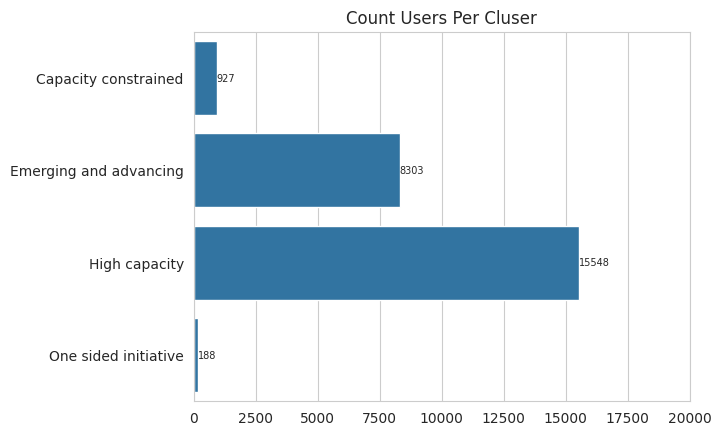

In [58]:
ax = sns.barplot(users_cluster, y="Cluster", x="Count Users", orient="y")
ax.set_title("Count Users Per Cluser")
ax.bar_label(ax.containers[0], fontsize=7)
ax.set(ylabel="", xlabel="")
ax.set_xlim(0, 20000)
plt.show()

In [59]:
count_countries_per_cluster = (
    df_odb_ranking[["ISO3", "Country", "Cluster"]]
    .merge(iso_3_countries_counts, left_on="ISO3", right_on="user_country3")
    .groupby("Cluster", as_index=False)
    ["Country"].count()
    .rename(columns={"Country": "Count Countries"})
)

Data visualisation

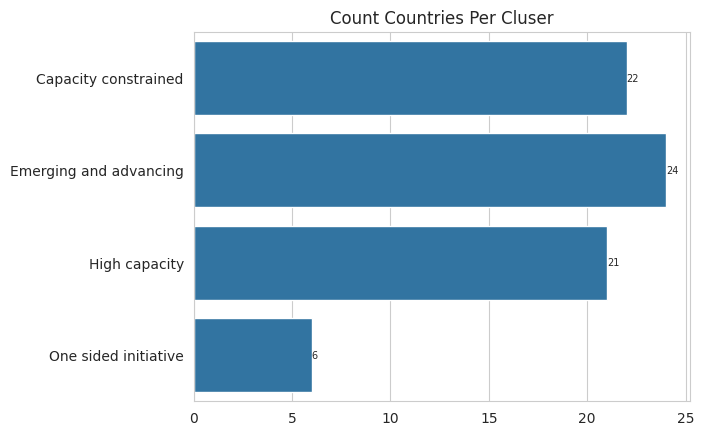

In [60]:
ax = sns.barplot(count_countries_per_cluster, y="Cluster", x="Count Countries", orient="y")
ax.set_title("Count Countries Per Cluser")
ax.bar_label(ax.containers[0], fontsize=7)
ax.set(ylabel="", xlabel="")
plt.show()

In [61]:
count_users = (
     df_odb_ranking[["ISO3", "Country", "Cluster"]]
    .merge(iso_3_countries_counts, left_on="ISO3", right_on="user_country3")
    .rename(columns={"user_id": "Count Users"})
)

fig = px.choropleth(
    count_users,
    locations="ISO3",
    color="Count Users",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.OrRd
  )
fig.show()

#Show Michal my cool map, think he'll like it.

#### Decision on Countries

# Removing Users in countries outside the ones in the ODB dataset.<font>

In [62]:
df_survey = df_survey[df_survey[CleanSurveyColumns.user_country3].isin(count_users["ISO3"])]

### Binding Together user demography information.

In [63]:
user_demographic_info = df_survey[~df_survey[CleanSurveyColumns.user_id].duplicated(keep="first")].copy()

In [64]:
user_demographic_info = user_demographic_info.loc[:, [
    CleanSurveyColumns.user_id,
    CleanSurveyColumns.response_id,
    CleanSurveyColumns.review_age,
    CleanSurveyColumns.review_education,
    CleanSurveyColumns.review_gender,
    CleanSurveyColumns.review_income,
    CleanSurveyColumns.review_political,
    CleanSurveyColumns.review_religious,
    ]]

In [65]:
df_survey = df_survey.sort_values([CleanSurveyColumns.user_id, CleanSurveyColumns.response_id])

In [66]:
df_survey.head()

,response_id,extended_session_id,user_id,scenario_order,intervention,pedped,barrier,crossing_signal,attribute_level,scenario_type_strict,...,diff_number_of_characters,saved,user_country3,review_age,review_education,review_gender,review_income,review_political,review_religious,binned_age
155476,9jzS5EWFZiQbsHEiv,-2029428506_2371697333.0,2.371697e+09,5,False,False,False,0,Male,Gender,...,0,True,USA,13.0,underHigh,female,default,1.0,0.0,under_16
155477,CQswuFcnovjjFtjrX,-2029428506_2371697333.0,2.371697e+09,9,False,True,False,1,Rand,Random,...,0,False,USA,13.0,underHigh,female,default,1.0,0.0,under_16
155478,LsR2ByGNnHC9kDFny,-2029428506_2371697333.0,2.371697e+09,1,False,False,False,0,Fit,Fitness,...,0,True,USA,13.0,underHigh,female,default,1.0,0.0,under_16
155479,c9gteeg2F6HhMM7B7,-2029428506_2371697333.0,2.371697e+09,8,False,False,False,0,Old,Age,...,0,False,USA,13.0,underHigh,female,default,1.0,0.0,under_16
155480,coEkzseTmEkLT29ah,-2029428506_2371697333.0,2.371697e+09,2,False,True,False,0,Pets,Species,...,0,True,USA,13.0,underHigh,female,default,1.0,0.0,under_16


In [67]:
df_survey.shape

(285364, 22)

In [68]:
df_survey.columns

Index(['response_id', 'extended_session_id', 'user_id', 'scenario_order',
       'intervention', 'pedped', 'barrier', 'crossing_signal',
       'attribute_level', 'scenario_type_strict', 'scenario_type',
       'number_of_characters', 'diff_number_of_characters', 'saved',
       'user_country3', 'review_age', 'review_education', 'review_gender',
       'review_income', 'review_political', 'review_religious', 'binned_age'],
      dtype='object')

In [69]:
df_survey.scenario_order

155476     5
155477     9
155478     1
155479     8
155480     2
          ..
299924     9
299925    11
299926     2
299927     8
299928     6
Name: scenario_order, Length: 285364, dtype: int16

In [70]:
filtered_scenario_order = df_survey[df_survey['scenario_order'].isin([11, 12, 13])]

# Statistical Significance

In [ ]:
clusters = merged_shared_countries_odb['Cluster'].unique()
regions = merged_shared_countries_odb['Region'].unique()

# Shapiro-Wilk Test
print("Shapiro-Wilk Test Results:")
for cluster in clusters:
    cluster_data = merged_shared_countries_odb[merged_shared_countries_odb['Cluster'] == cluster]['Estimated_Omission_Commission']
    if len(cluster_data) >= 3:
        stat, p = stats.shapiro(cluster_data)
        print(f"Cluster: {cluster} - Statistic={stat}, p-value={p}")
    else:
        print(f"Cluster: {cluster} - Not enough data for Shapiro-Wilk test")

for region in regions:
    region_data = merged_shared_countries_odb[merged_shared_countries_odb['Region'] == region]['Estimated_Omission_Commission']
    if len(region_data) >= 3:
        stat, p = stats.shapiro(region_data)
        print(f"Region: {region} - Statistic={stat}, p-value={p}")
    else:
        print(f"Region: {region} - Not enough data for Shapiro-Wilk test")

# Q-Q Plots
def plot_qq(data, title):
    plt.figure(figsize=(6, 6))
    qqplot(data, line ='s')
    plt.title(title)
    plt.show()

print("\nQ-Q Plots:")
for cluster in clusters:
    cluster_data = merged_shared_countries_odb[merged_shared_countries_odb['Cluster'] == cluster]['Estimated_Omission_Commission']
    if len(cluster_data) >= 3:
        plot_qq(cluster_data, f'Q-Q Plot for Cluster {cluster}')
    else:
        print(f"Cluster: {cluster} - Not enough data for Q-Q plot")

for region in regions:
    region_data = merged_shared_countries_odb[merged_shared_countries_odb['Region'] == region]['Estimated_Omission_Commission']
    if len(region_data) >= 3:
        plot_qq(region_data, f'Q-Q Plot for Region {region}')
    else:
        print(f"Region: {region} - Not enough data for Q-Q plot")

# the histograms
def plot_histogram(data, title):
    plt.figure(figsize=(6, 4))
    plt.hist(data, bins=10, edgecolor='k', alpha=0.7)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

print("\nHistograms:")
for cluster in clusters:
    cluster_data = merged_shared_countries_odb[merged_shared_countries_odb['Cluster'] == cluster]['Estimated_Omission_Commission']
    if len(cluster_data) >= 3:
        plot_histogram(cluster_data, f'Histogram for Cluster {cluster}')
    else:
        print(f"Cluster: {cluster} - Not enough data for histogram")

for region in regions:
    region_data = merged_shared_countries_odb[merged_shared_countries_odb['Region'] == region]['Estimated_Omission_Commission']
    if len(region_data) >= 3:
        plot_histogram(region_data, f'Histogram for Region {region}')
    else:
        print(f"Region: {region} - Not enough data for histogram")

# Descriptive Statistics
def print_descriptive_stats(data, label):
    skewness = stats.skew(data)
    kurtosis = stats.kurtosis(data) + 3  # To match the normal distribution's kurtosis
    print(f"{label} - Skewness: {skewness}, Kurtosis: {kurtosis}")

print("\nDescriptive Statistics:")
for cluster in clusters:
    cluster_data = merged_shared_countries_odb[merged_shared_countries_odb['Cluster'] == cluster]['Estimated_Omission_Commission']
    if len(cluster_data) >= 3:
        print_descriptive_stats(cluster_data, f'Cluster {cluster}')
    else:
        print(f"Cluster: {cluster} - Not enough data for descriptive statistics")

for region in regions:
    region_data = merged_shared_countries_odb[merged_shared_countries_odb['Region'] == region]['Estimated_Omission_Commission']
    if len(region_data) >= 3:
        print_descriptive_stats(region_data, f'Region {region}')
    else:
        print(f"Region: {region} - Not enough data for descriptive statistics")


The output of the code shows that there are indications that the data might not be normally distributed within clusters and regions. Since ANOVA assumes normality of the dependent variable, another statistical test should be tried as its results could be unreliable if this assumption is violated.

For the research we will focus on Kruskal-Wallis and Chi-Square tests given the output of our data might be considered not be normally distributed.

### Kruskal-Wallis

After feature selection and before the application of machine learning algorithms, applying Kruskal-Wallis test. This non-parametric method will help me ascertain the statistical significance of the features, particularly focusing on their impact on the response variables. This step is crucial for understanding which features significantly influence outcomes and ensuring that the model includes only the most relevant predictors

In [71]:
from scipy.stats import kruskal

# Example usage with hypothetical data loaded into `data`
if users_cluster.groupby('Cluster')['Count Users'].count().min() > 0:
    kruskal_results = kruskal(
        *[group['Count Users'].values for name, group in users_cluster.groupby('Cluster')]
    )
    print(f"Kruskal-Wallis Test Result - Statistic: {kruskal_results.statistic}, P-value: {kruskal_results.pvalue}")
else:
    print("Not enough data in each cluster to perform Kruskal-Wallis Test.")


Kruskal-Wallis Test Result - Statistic: 3.0, P-value: 0.3916251762710877


###Chi-Square Test for Independence

To determine if there is any association between your categorical predictors and the binary outcome 'saved', a chi-square test is performed for each categorical variable. This test helps identify if the variations in the categorical input variables have any statistical relationship with the outcome variable

In [72]:
import pandas as pd
import scipy.stats as stats

# Example: Test independence between 'user_country3' and 'saved'
contingency_table = pd.crosstab(df_survey['user_country3'], df_survey['saved'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square test result for user_country3 vs saved: Chi2={chi2}, P-value={p}")
if p < 0.05:
    print("Significant association between country and saving option.")
else:
    print("No significant association between country and saving option.")


Chi-square test result for user_country3 vs saved: Chi2=194.37897216426637, P-value=3.4178596344076345e-13
Significant association between country and saving option.




---



---



---



# Machine Learning Algorithms

Applying the learning models in order to train the machine.

Importing necessary libraries and models

In [8]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import gc
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Random state is 42, constant number in order to ensure model consistancy between runs.

In [74]:
np.random.seed(42)



### Selecting input and output columns

In [75]:
inp_cols = ['scenario_order',
       'intervention', 'pedped', 'barrier', 'crossing_signal',
       'attribute_level', 'scenario_type_strict', 'scenario_type',
       'diff_number_of_characters','user_country3','binned_age']
out_cols = ['saved']

x = df_survey[inp_cols]
y = df_survey[out_cols]
x

,scenario_order,intervention,pedped,barrier,crossing_signal,attribute_level,scenario_type_strict,scenario_type,diff_number_of_characters,user_country3,binned_age
155476,5,False,False,False,0,Male,Gender,Gender,0,USA,under_16
155477,9,False,True,False,1,Rand,Random,Random,0,USA,under_16
155478,1,False,False,False,0,Fit,Fitness,Fitness,0,USA,under_16
155479,8,False,False,False,0,Old,Age,Age,0,USA,under_16
155480,2,False,True,False,0,Pets,Species,Species,0,USA,under_16
...,...,...,...,...,...,...,...,...,...,...,...
299924,9,False,False,False,1,Rand,Random,Random,2,CZE,between_26_and_30
299925,11,False,True,False,2,Pets,Species,Species,0,CZE,between_26_and_30
299926,2,False,True,False,0,Female,Gender,Gender,0,CZE,between_26_and_30
299927,8,False,True,False,2,Low,Social Status,Social Status,0,CZE,between_26_and_30


## Applying an encoder for converting categorical values into numbers


This is necessart because the model accept only numbers

In [76]:
encoder = LabelEncoder()
x['intervention'] = encoder.fit_transform(x['intervention'])
x['pedped'] = encoder.fit_transform(x['pedped'])
x['barrier'] = encoder.fit_transform(x['barrier'])
x['attribute_level'] = encoder.fit_transform(x['attribute_level'])
x['scenario_type_strict'] = encoder.fit_transform(x['scenario_type_strict'])
x['scenario_type'] = encoder.fit_transform(x['scenario_type'])
x['user_country3'] = encoder.fit_transform(x['user_country3'])
x['binned_age'] = encoder.fit_transform(x['binned_age'])
x.tail(20)

<ipython-input-76-3ee393ba6a75>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-3ee393ba6a75>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-3ee393ba6a75>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-76-3ee393b

,scenario_order,intervention,pedped,barrier,crossing_signal,attribute_level,scenario_type_strict,scenario_type,diff_number_of_characters,user_country3,binned_age
230373,13,0,0,0,2,2,1,1,0,30,4
230374,5,0,1,0,0,9,0,0,0,30,4
230375,9,0,1,0,0,11,1,3,0,30,4
230376,11,0,0,0,1,5,6,6,2,30,4
230377,10,0,1,0,0,6,4,4,0,30,4
230378,7,0,0,1,0,1,2,2,0,30,4
230379,3,0,0,0,2,11,3,3,2,30,4
299916,5,0,0,0,2,4,5,5,0,14,2
299917,10,0,1,0,2,11,4,3,0,14,2
299918,12,0,0,0,0,5,6,6,2,14,2


In [77]:
y['saved'] = encoder.fit_transform(y['saved'])

<ipython-input-77-3527fb4b9289>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
cols = x.columns

## Applying normalizing to the the data

Meaning that all numbers will be in between of 0 or 1

In [79]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=cols)
x_scaled.head()

,scenario_order,intervention,pedped,barrier,crossing_signal,attribute_level,scenario_type_strict,scenario_type,diff_number_of_characters,user_country3,binned_age
0,0.333333,0.0,0.0,0.0,0.0,0.583333,0.333333,0.333333,0.0,0.944444,0.944444
1,0.666667,0.0,1.0,0.0,0.5,0.916667,0.500000,0.500000,0.0,0.944444,0.944444
2,0.000000,0.0,0.0,0.0,0.0,0.166667,0.166667,0.166667,0.0,0.944444,0.944444
3,0.583333,0.0,0.0,0.0,0.0,0.750000,0.000000,0.000000,0.0,0.944444,0.944444
4,0.083333,0.0,1.0,0.0,0.0,0.833333,0.833333,0.833333,0.0,0.944444,0.944444


## Splitting data into two parts, training and testing for both x and y

In [80]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## The Baseline ML model: Logistic Regression




In [ ]:
lg_params = {
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"],
    "C": [0.0001, 0.001, 0.01, 0.1, 0.5, 1]
}

In [ ]:
model_LR = LogisticRegression()
lg_gridsearch = RandomizedSearchCV(
    model_LR, lg_params, random_state=42, cv=5, scoring="accuracy"
    )
lg_gridsearch.fit(X_train, np.ravel(y_train))
y_pred = lg_gridsearch.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, np.ravel(y_pred))
print(f'logistic regression Accuracy: {accuracy:.2f}')
# classification report
print("\nClassification Report:\n", classification_report(y_test, np.ravel(y_pred)))

# confusion matrix
conf_matrix = confusion_matrix(y_test, np.ravel(y_pred))
print("Confusion Matrix:\n", conf_matrix)

#joblib.dump(model_LR, '/content/drive/My Drive/trained_models_feature_selection/logistic_regression.pkl')
print(lg_gridsearch.best_params_)
del lg_gridsearch

logistic regression Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.76      0.65     30702
           1       0.53      0.31      0.39     26371

    accuracy                           0.56     57073
   macro avg       0.55      0.54      0.52     57073
weighted avg       0.55      0.56      0.53     57073

Confusion Matrix:
 [[23417  7285]
 [18106  8265]]
{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.5}


Result of the second ML model: accuracy of 0.55

## Applying the first ML model: Decision tree classifier


In [ ]:
DT_params = {
    "criterion": ["gini", "entropy"],  # Measures the quality of a split
    "splitter": ["best", "random"],    # Strategy used to choose the split at each node
    "max_depth": [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10, 20],  # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 5, 10],  # Minimum number of samples required to be at a leaf node
    "max_features": [None, "auto", "sqrt", "log2"],  # Number of features to consider when looking for the best split
    "max_leaf_nodes": [None, 10, 20, 30, 40, 50],  # Maximum number of terminal nodes or leaves in a tree
}

In [ ]:
model_DT = DecisionTreeClassifier()
DT_gridsearch = RandomizedSearchCV(
    model_DT, DT_params, random_state=42, cv=5, scoring="accuracy"
    )
DT_gridsearch.fit(X_train, np.ravel(y_train))
y_pred = DT_gridsearch.best_estimator_.predict(X_test)

model_DT.fit(X_train, np.ravel(y_train))
y_pred = DT_gridsearch.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, np.ravel(y_pred))
print(f'Decision Tree Accuracy: {accuracy:.2f}')
# classification report
print("\nClassification Report:\n", classification_report(y_test, np.ravel(y_pred)))

# confusion matrix
conf_matrix = confusion_matrix(y_test, np.ravel(y_pred))
print("Confusion Matrix:\n", conf_matrix)

#joblib.dump(model, '/content/drive/My Drive/trained_models_feature_selection/decision_tree_model.pkl')
print(DT_gridsearch.best_params_)
del DT_gridsearch

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarn

Decision Tree Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76     30702
           1       0.72      0.68      0.70     26371

    accuracy                           0.73     57073
   macro avg       0.73      0.73      0.73     57073
weighted avg       0.73      0.73      0.73     57073

Confusion Matrix:
 [[23758  6944]
 [ 8308 18063]]
{'splitter': 'best', 'min_samples_split': 20, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}


Result of first ML model: an accuracy of 0.67

Memory management with garbage collection

In [ ]:
gc.collect()

7667

## Applying the second ML Model: Random Forest

In [89]:
RF_params = {
    'n_estimators': [50,100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],    # Maximum number of levels in each tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 5],          # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt']    # Number of features to consider at every split
}

In [90]:
model_RF = RandomForestClassifier(random_state=42)
RF_gridsearch = RandomizedSearchCV(
    model_RF, RF_params, n_iter=50, random_state=42, cv=5, scoring="accuracy", n_jobs=2, verbose=1
)
RF_gridsearch.fit(X_train, np.ravel(y_train))
y_pred = RF_gridsearch.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, np.ravel(y_pred))
print(f'Random Forest Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, np.ravel(y_pred)))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, np.ravel(y_pred))
print("Confusion Matrix:\n", conf_matrix)

# save the model
# joblib.dump(RF_gridsearch.best_estimator_, '/content/drive/My Drive/trained_models_feature_selection/random_forest_model.pkl')

# Display the best parameters
print("Best Parameters:\n", RF_gridsearch.best_params_)
del RF_gridsearch

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     30702
           1       0.73      0.67      0.70     26371

    accuracy                           0.73     57073
   macro avg       0.73      0.73      0.73     57073
weighted avg       0.73      0.73      0.73     57073

Confusion Matrix:
 [[24215  6487]
 [ 8721 17650]]
Best Parameters:
 {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


Result from the second ML model: accuracy of 0.73

## Applying the third ML model: Neural Network MLPclassfier (multi layer perceptron)


In [82]:
NN_params =  {
    "hidden_layer_sizes": [(50,), (100,), (100, 50), (100, 100), (50, 50, 50)],
    "activation": ["logistic", "tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0.1],
    "learning_rate": ["constant", "invscaling", "adaptive"],
    "learning_rate_init": [0.001, 0.01, 0.1],
    "max_iter": [200, 500, 1000],
    "momentum": [0.9, 0.95, 0.99],
    "early_stopping": [False, True],
    "validation_fraction": [0.1, 0.2]
}

In [83]:
model_NN = MLPClassifier()
NN_gridsearch = RandomizedSearchCV(
    model_NN, NN_params, random_state=42, cv=5, scoring="accuracy"
    )
NN_gridsearch.fit(X_train, np.ravel(y_train))
y_pred = NN_gridsearch.best_estimator_.predict(X_test)

model_NN = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model_NN.fit(X_train, np.ravel(y_train))

# Evaluate the model's accuracy on the test data
y_pred = NN_gridsearch.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, np.ravel(y_pred))
print(f'Neural Network Accuracy: {accuracy:.2f}')
# classification report
print("\nClassification Report:\n", classification_report(y_test, np.ravel(y_pred)))

# confusion matrix
conf_matrix = confusion_matrix(y_test, np.ravel(y_pred))
print("Confusion Matrix:\n", conf_matrix)

# # Save the trained model
#joblib.dump(model_NN, '/content/drive/My Drive/trained_models_feature_selection/neural_network.pkl')

# Delete the model object to free up memory
print(NN_gridsearch.best_params_)
del model_NN
del NN_gridsearch

Neural Network Accuracy: 0.73

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76     30702
           1       0.73      0.67      0.70     26371

    accuracy                           0.73     57073
   macro avg       0.73      0.73      0.73     57073
weighted avg       0.73      0.73      0.73     57073

Confusion Matrix:
 [[24166  6536]
 [ 8612 17759]]
{'validation_fraction': 0.2, 'solver': 'adam', 'momentum': 0.9, 'max_iter': 1000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 100), 'early_stopping': True, 'alpha': 0.0001, 'activation': 'tanh'}


Result from the third ML model: accuracy of 0.73

### Applying the fourth ML model: KNN

In [81]:
KNN_params = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2]  # p=1 corresponds to Manhattan distance, p=2 corresponds to Euclidean distance
}

In [82]:
model_KNN = KNeighborsClassifier()
KNN_gridsearch = RandomizedSearchCV(
    model_KNN, KNN_params, n_iter=50, random_state=42, cv=5, scoring="accuracy", n_jobs=-1, verbose=1
)

KNN_gridsearch.fit(X_train, np.ravel(y_train))
y_pred = KNN_gridsearch.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, np.ravel(y_pred))
print(f'K-Nearest Neighbors Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:\n", classification_report(y_test, np.ravel(y_pred)))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, np.ravel(y_pred))
print("Confusion Matrix:\n", conf_matrix)

# save the model
# joblib.dump(KNN_gridsearch.best_estimator_, '/path_to_save_model/knn_model.pkl')

# Display the best parameters
print("Best Parameters:\n", KNN_gridsearch.best_params_)
del KNN_gridsearch

Fitting 5 folds for each of 50 candidates, totalling 250 fits
K-Nearest Neighbors Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74     30702
           1       0.71      0.62      0.66     26371

    accuracy                           0.71     57073
   macro avg       0.71      0.70      0.70     57073
weighted avg       0.71      0.71      0.71     57073

Confusion Matrix:
 [[24085  6617]
 [ 9979 16392]]
Best Parameters:
 {'weights': 'uniform', 'p': 1, 'n_neighbors': 20, 'leaf_size': 10, 'algorithm': 'brute'}


Result from the fourth ML model: accuracy of 0.71

## Possible extra models

### Applying the third ML model: Support Vector Classifier


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier
model_SVC = SVC(kernel='linear')  # You can change the kernel based on your data

# Train the model
model_SVC.fit(X_train, np.ravel(y_train))

# Make predictions
y_pred = model_SVC.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVC Accuracy: {accuracy:.2f}')


### Applying the fourth ML model: Ensemble Methods (Stacking)

In [ ]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(random_state=42))
]

# Initialize the Stacking Classifier
model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Train the model
model.fit(X_train, np.ravel(y_train))

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Stacking Model Accuracy: {accuracy:.2f}')


Overview ML models

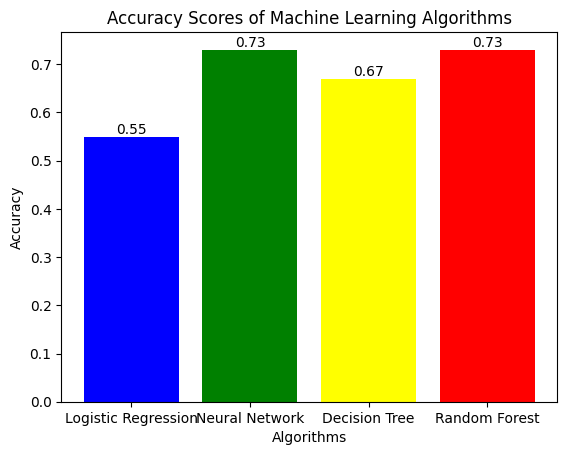

In [1]:
algorithms = ['Logistic Regression', 'Neural Network','Decision Tree', 'Random Forest']
accuracies = [0.55, 0.73, 0.67, 0.73]

# Creating the bar chart
fig, ax = plt.subplots()
bars = ax.bar(algorithms, accuracies, color=['blue', 'green', 'yellow','red'])

# Adding the accuracy values on top of the bars
ax.bar_label(bars)

# Setting labels and title
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores of Machine Learning Algorithms')

# Show the plot
plt.show()


## In between conclusion: as shown in the bar chart. The accuracy score of the Neural Network is the highest from the classifiers




I achieved the same accuracy with and without normalization, so decided to use Principal Component Analysis (PCA). PCA helps us simplify the input variables. It does this by combining variables that are related to each other into a single variable. For instance, if two variables can be used to calculate each other, PCA will merge them into one.

Applying PCA

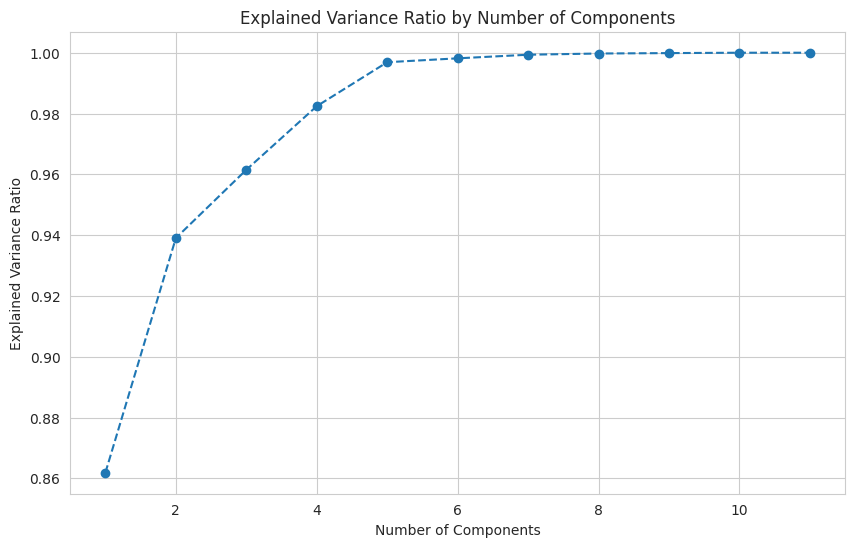

Optimal number of components: 3


In [ ]:
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Determine the optimal number of components using the elbow method
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
optimal_components = 0
for i, ratio in enumerate(cumulative_variance_ratio):
    if ratio >= 0.95:  # Adjust this threshold as needed
        optimal_components = i + 1
        break

print(f'Optimal number of components: {optimal_components}')

Result from PCA: the optimal number of components, as presented in the graph, is 3. In order to make sure the data is tested properly, I also decided to test 4 and 5.

In [ ]:
X_train_pca_df = pd.DataFrame(X_train_pca,columns=cols)

In [ ]:
pca = PCA(n_components=5, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

    # Initialize and train the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train_pca, np.ravel(y_train))

    # Make predictions
y_pred = model.predict(X_test_pca)

    # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Neural Network Accuracy with {4} PCA components: {accuracy:.2f}')

Neural Network Accuracy with 4 PCA components: 0.69


In [ ]:
pca = PCA(n_components=5, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

    # Initialize and train the MLP classifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train_pca, np.ravel(y_train))

    # Make predictions
y_pred = model.predict(X_test_pca)

    # Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Neural Network Accuracy with {5} PCA components: {accuracy:.2f}')

Neural Network Accuracy with 5 PCA components: 0.69


With PCA, I noticed a decrease in accuracy, indicating that there are no linear combinations among the data variables.

Consequently, the model I have chosen as the final result is saved without PCA, under the file name 'neural_network.pkl'